# Demo of a KDE plot beside timeseries set

In [1]:
%pylab inline
import pysd
import numpy as np
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


### Load the model using PySD
The model is a basic, 1-stock carbon bathtub model

In [2]:
model = pysd.read_vensim('../../models/Climate/Atmospheric_Bathtub.mdl')
print(model.doc)

                   Real Name                    Py Name Subscripts  Units  \
0                  Emissions                  emissions       None   None   
1  Excess Atmospheric Carbon  excess_atmospheric_carbon       None   None   
2                 FINAL TIME                 final_time       None  Month   
3               INITIAL TIME               initial_time       None  Month   
4            Natural Removal            natural_removal       None   None   
5           Removal Constant           removal_constant       None   None   
6                    SAVEPER                    saveper       None  Month   
7                  TIME STEP                  time_step       None  Month   
8                       Time                       time       None   None   

       Limits       Type Subtype                                     Comment  
0  (nan, nan)   Constant  Normal                                        None  
1  (nan, nan)   Stateful   Integ                                       

### Generate a set of parameters to use as input
Here, drawing 100 constant values for the `Emissions` parameter from an exponential distribution

In [5]:
n_runs = 100
runs = pd.DataFrame({'Emissions': np.random.exponential(scale=10000, size=n_runs)})
runs.head()

,Emissions
0,30739.241088
1,19597.098505
2,30075.873591
3,623.753990
4,659.644094


### Run the model with the various parameters

In [6]:
result = runs.apply(lambda p: model.run(params=dict(p))['Excess Atmospheric Carbon'],
                    axis=1).T
result.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,30739.241088,19597.098505,30075.873591,623.753990,659.644094,411.705469,17672.646070,15960.288902,1870.901399,1681.321388,...,3638.205953,4919.785317,1759.569986,1638.519468,2116.223495,28503.985071,3826.219122,543.636820,2100.672416,3600.921744
2,61171.089765,38998.226026,59850.988445,1241.270441,1312.691748,819.293882,35168.565680,31760.974916,3723.093784,3345.829562,...,7240.029846,9790.372781,3501.544273,3260.653742,4211.284754,56722.930291,7614.176054,1081.837271,4180.338107,7165.834270
3,91298.619955,58205.342271,89328.352152,1852.611727,1959.208924,1222.806412,52489.526093,47403.654069,5556.764246,4993.692654,...,10805.835500,14612.254371,5226.098817,4866.566672,6285.395401,84659.686059,11364.253415,1614.655718,6239.207142,10695.097671
4,121124.874843,77220.387354,118510.942221,2457.839600,2599.260929,1622.283817,69637.276902,62889.906430,7372.098002,6625.077116,...,14335.983098,19385.917144,6933.407815,6456.420474,8338.764942,112317.074270,15076.830004,2142.145981,8277.487486,14189.068439


### Draw a plot showing the results, and a marginal density plot

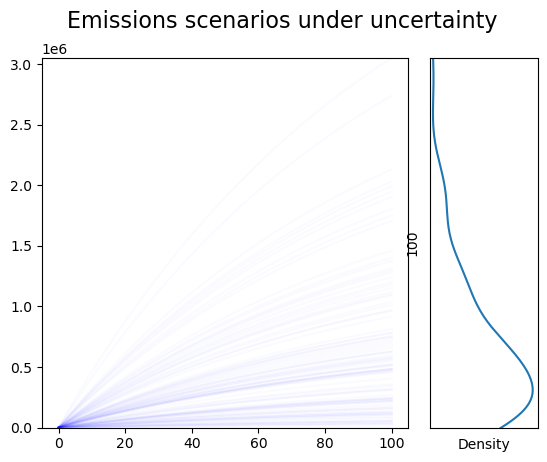

In [12]:
# left side should have all traces plotted
plt.subplot2grid((1,4), loc=(0,0), colspan=3)
[plt.plot(result.index, result[i], 'b', alpha=.02) for i in result.columns]
plt.ylim(0, max(result.iloc[-1]))

# right side has gaussian KDE on last timestamp
plt.subplot2grid((1,4), loc=(0,3))
seaborn.kdeplot(y=result.iloc[-1])
plt.ylim(0, max(result.iloc[-1]));
plt.yticks([])
plt.xticks([])

plt.suptitle('Emissions scenarios under uncertainty', fontsize=16);